# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Supervised learning: Regression problem </center>

## Table of contents  
  
1. [Метрики качества модели](#metrics)
2. [Пример: House Sales in King County, USA](#house_case)
3. [Обучающая и тестовая выборки](#train_test)
4. [Непараметрические (метрические) методы](#nonparam)  
    4.1 [K-Nearest Neighbors](#knn)    
    4.2 [Raduis-Nearest Neighbors](#rnn)  
5. [Сохранение модели](#save)  
6. [Задания](#tasks)

## Метрики качества модели <a name="metrics"></a>

В задаче регрессии в качестве метрик качества, как правило, используют различные функционалы ошибок - метрики, показывающие, насколько сильно ошибается модель при прогнозе.  
Метрики в питоне можно посмотреть [здесь](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

* __Среднеквадратичная ошибка (Mean Squared Error)__  
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(a(x_{i}) - y_{i})^2$$

* __Корень среднеквадратичной ошибки (Root Mean Squared Error)__
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(a(x_{i}) - y_{i})^2}$$

* __Средняя абсолютная ошибка (Mean absolute error)__
$$MAE = \frac{1}{n}\sum_{i=1}^{n}\left |a(x_{i}) - y_{i}\right |$$

* __Медианная абсолютная ошибка (Median absolute error)__
$$MedAE = Q_{2}(\{\left |a(x_{i}) - y_{i}\right | : i = \overline{1, n}\}), $$ где $Q_{2}$ -  0.5-квантиль a.k.a медиана.

* __Коэффициент детерминации__  
<br>  
Используется для сравнения модели $a(x)$ со средним значением целевой переменной по набору данных (__baseline__)
$$R^{2} = 1 - \frac{\sum_{i=1}^{n}(a(x) - y_{i})^{2}}{\sum_{i=1}^{n}(\overline{y} - y_{i})^{2}},$$ где $\overline{y}$ - среднее значение целевой переменной по наблюдаемым данным.

## Пример: House Sales in King County, USA <a name="house_case"></a>

Будем пробовать различные методы, чтобы научиться определять цену на недвижимость.  
Данные взяты с [одноименного соревнования](https://www.kaggle.com/harlfoxem/housesalesprediction) на Kaggle.  

Данные содержат информацию о продажах индивидуальных домов в период с мая 2014 года по май 2015 в округе Кинг, штат Вашингтон, США.

In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('seaborn')

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = (8, 5)

In [4]:
house_data = pd.read_csv("kc_house_data.csv")

In [5]:
pd.set_option('display.max_columns', 25)

In [6]:
house_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
house_data.shape

(21613, 21)

In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Признаки

In [9]:
# чтобы текст в таблицах выводился польностью
pd.set_option('display.max_colwidth', None) # use -1 instead of None for pandas older than 1.0

In [11]:
pd.read_csv('kc_house_features.csv', 
            delimiter=';', 
            encoding='windows-1251')

,Название признака,Описание
0,id,уникальный идентификационный номер проданного дома
1,date,дата продажи дома
2,bedrooms,количество спален
3,bathrooms,"количество ванных комнат (где 0.25 обозначает, что комната с туалетом, 0.5 – комната с туалетом и раковиной)"
4,sqft_living,общая площадь дома
5,sqft_lot,площадь прилегающей территории
6,floors,количество этажей
7,waterfront,"бинарный атрибут, указывающий на то, есть ли вид на реку или нет"
8,view,оценка внешнего вида дома (от 0 до 4)
9,condition,оценка состояния дома (от 0 до 5)


### Комментарии по признакам

__price__ - целевая переменная.

__id__ - уникален для каждого объекта, необходимо удалить из выборки.

**zipcode** - формально числовой, но по сути таковым не является.  
Если посмотрим на уникальные значения, увидим, что их всего 70 (для +21k объектов), хотя представлены разным количеством наблюдений. Его можно заменить на категориальный, а потом перевести в бинарный.  
С другой стороны в самом числовом коде может быть заложена потенциально полезная информация. Имеет смысл попробовать оба варианта.

In [12]:
len(house_data.zipcode.unique())

70

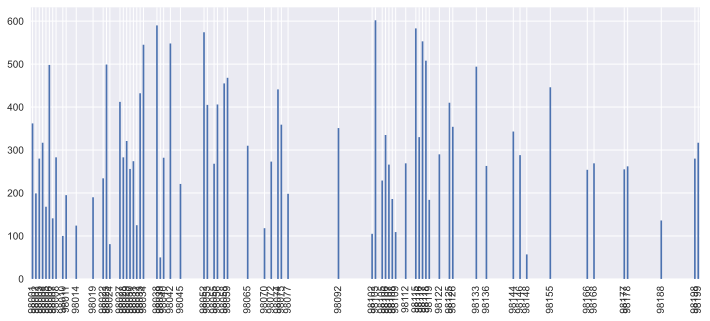

In [13]:
plt.figure(figsize=(12, 5))
house_data.zipcode.value_counts().plot(kind='bar')
plt.show()

Есть три признака, связанных с датами: 
* __date__ - дата продажи дома
* __yr_built__ - год строительства дома
* __yr_renovated__ - год последнего ремонта или последней реконструкции  
  
Сами по себе они при решении задачи регресси, скорее всего, ничего не дадут. Но из них можно получить два потенциально полезных признака: возраст дома, и как давно его отремонтировани. Правда, эти значения будут приближенными, т.к. у нас есть только год.

Кроме того, в признаке __yr_renovated__ часто втречаются нули, что может являться либо выбросами, либо говорить о том, что дом не ремонтировался.

In [15]:
house_data.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

Посмотрим еще на три признака: 
* __sqft_living__ - общая площадь дома
* __sqft_above__ - общая площадь наземной части дома
* __sqft_basement__ - общая площадь подземного части дома  
  
Здравый смысл нам подсказываем, а питон доказывает, что эти признаки линейно связаны, а именно:  
$$sqft\_basement = sqft\_living - sqft\_above$$
  
Поэтому признак sqft_basement можно удалить, оставив остальные два.

In [16]:
t = house_data.sqft_basement == (house_data.sqft_living - house_data.sqft_above)
t.all()

True

Признаки **lat** и **long** неоднозначные, но оставим их - вдруг помогут учесть географическое расположение домов. 

In [17]:
house_data[['lat', 'long']].describe()

,lat,long
count,21613.000000,21613.000000
mean,47.560053,-122.213896
std,0.138564,0.140828
min,47.155900,-122.519000
25%,47.471000,-122.328000
50%,47.571800,-122.230000
75%,47.678000,-122.125000
max,47.777600,-121.315000


Также имеет смысл попробовать перевести в бинарные переменные признаки **floors**, **view**, **condition** и **grade**.

In [18]:
# число уникальных значений по признакам
house_data[['bedrooms', 
            'bathrooms', 
            'floors', 
            'view',
            'condition', 
            'grade', 
            'yr_built',
            'yr_renovated', 
          ]].apply(lambda x: x.nunique(), axis=0)

bedrooms         13
bathrooms        30
floors            6
view              5
condition         5
grade            12
yr_built        116
yr_renovated     70
dtype: int64

### Предобработка данных

Оставим feature engineering на десерт, а пока просто удалим явным образом не подходящие признаки.

In [19]:
data = house_data.drop(['id', 'zipcode', 'date', 'sqft_living'], axis=1, inplace=False)

<AxesSubplot:>

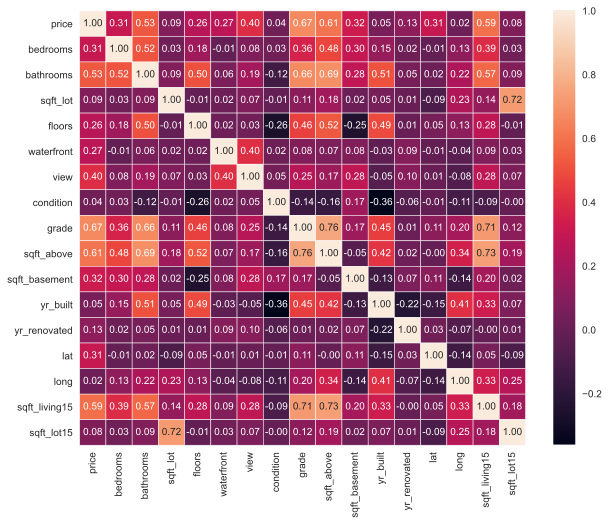

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=.5)

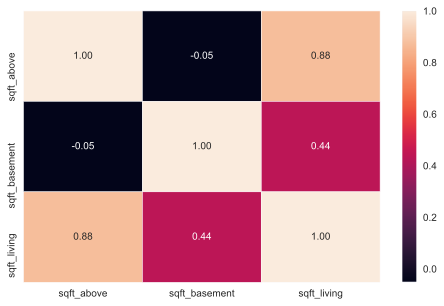

In [21]:
sns.heatmap(house_data[['sqft_above', 'sqft_basement', 'sqft_living']].corr(), annot=True, fmt=".2f", linewidths=.5)
plt.show()

In [22]:
np.linalg.matrix_rank(house_data[['sqft_above', 'sqft_basement', 'sqft_living']])

2

## Обучающая и тестовая выборки <a name="train_test"></a>

Для тестирования пока применим самый простой метод - разделим датасет на две части: на одной будем обучать, на другой оценивать качество модели.  
Различные способы тестирования и валидации доступны в модуле [sklearn.model_selection](http://scikit-learn.org/stable/modules/cross_validation.html).

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data.drop('price', axis=1),
                                            data['price'],
                                            test_size=0.3, 
                                            random_state=5)

В текущей версии sklearn (0.23.2) научился сохранять формат данных, поэтому trainData и testData останутся DataFrame, а  DependentVariables будут Series (раньше переходили в ndarray).

In [25]:
trainData

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
17639,3,2.00,12443,1.0,0,0,3,7,1930,0,1969,0,47.4906,-121.775,1400,12183
11482,4,2.50,2600,2.0,0,0,5,8,1670,850,1925,0,47.6434,-122.358,2290,3600
14834,3,1.00,9000,1.5,0,0,4,6,1280,0,1954,0,47.4915,-122.338,1430,4500
17221,4,2.25,8500,2.0,0,0,4,8,2500,0,1979,0,47.5569,-122.151,2470,9100
7112,3,2.00,6300,1.0,0,0,3,7,1560,0,1924,0,47.5407,-122.379,1620,6300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,3,1.75,5000,1.5,0,0,3,8,2100,0,1916,0,47.6776,-122.360,1830,4200
3046,3,1.00,10500,1.0,0,0,3,7,960,370,1963,0,47.7204,-122.196,1460,11550
20463,3,2.50,7136,2.0,0,0,3,8,2730,0,2012,0,47.3938,-122.321,2130,8932
18638,2,1.50,3408,1.0,0,0,4,7,960,960,1912,0,47.6118,-122.299,1130,3408


In [26]:
testData.shape

(6484, 16)

In [27]:
trainDependentVariables

17639     390000.0
11482    1125000.0
14834     240000.0
17221     760000.0
7112      528000.0
           ...    
5520      700000.0
3046      386900.0
20463     510000.0
18638     517000.0
2915      455000.0
Name: price, Length: 15129, dtype: float64

In [28]:
testDependentVariables.shape

(6484,)

## Непараметрические (метрические) методы <a name="nonparam"></a>

## K Nearest Neighbors <a name="knn"></a>

Модуль [sklearn.neighbors](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors).

Обучим модель

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
knrModel = KNeighborsRegressor(n_neighbors=5)

knrModel.fit(trainData, trainDependentVariables)

KNeighborsRegressor()

In [31]:
%%time
predictedDependentVariables = knrModel.predict(testData)

MemoryError: Unable to allocate 748. MiB for an array with shape (6484, 15129) and data type float64

Оценим качество

In [32]:
from sklearn import metrics

In [30]:
def compute_metrics(y_pred, y_true, return_metrics=False):
    mse = metrics.mean_squared_error(y_pred=y_pred, 
                                     y_true=y_true)

    rmse = np.sqrt(mse)

    mae = metrics.mean_absolute_error(y_pred=y_pred, 
                                      y_true=y_true)

    medae = metrics.median_absolute_error(y_pred=y_pred, 
                                          y_true=y_true)

    R2 = metrics.r2_score(y_pred=y_pred, 
                          y_true=y_true)
    
    if return_metrics: 
        return mse, rmse, mae, medae, R2
    else:
        print(f"MSE:   {mse}\nRMSE:  {rmse}\nMAE:   {mae}\nMedAE: {medae}\nR2:    {R2}")

In [31]:
compute_metrics(y_pred=predictedDependentVariables, 
                y_true=testDependentVariables)

MSE:   74614575341.65414
RMSE:  273156.6864304335
MAE:   164662.79194941395
MedAE: 108990.0
R2:    0.46199011535494827


<AxesSubplot:>

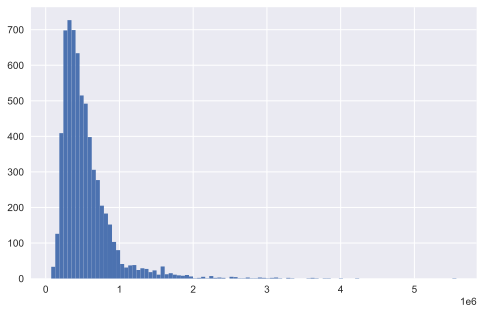

In [32]:
testDependentVariables.hist(bins=100)

In [33]:
mae = pd.Series(predictedDependentVariables - testDependentVariables).abs()

<AxesSubplot:>

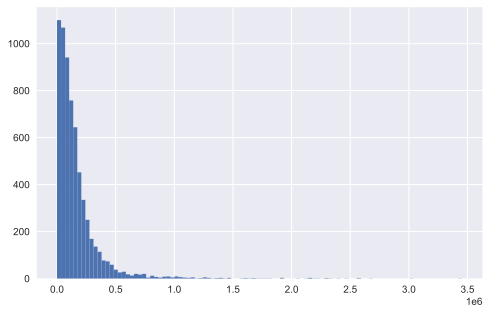

In [34]:
mae.hist(bins=100)

32.77025202115108


<AxesSubplot:>

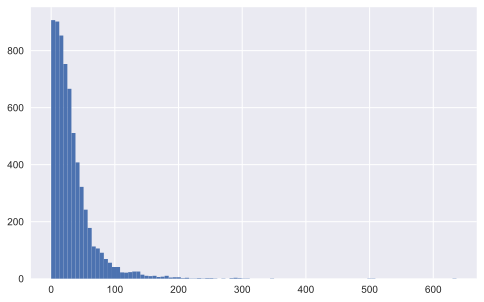

In [35]:
pmae = mae/testDependentVariables * 100
print(pmae.mean())

pmae.hist(bins=100)

Приведем данные к стандартному виду

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
house_scaler = MinMaxScaler()
house_scaler.fit(trainData)

MinMaxScaler()

In [38]:
trainData = house_scaler.transform(trainData) # вернет ndarray
testData = house_scaler.transform(testData)   # вернет ndarray

In [39]:
trainData.min(axis=0).round(3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
trainData.max(axis=0).round(3)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [41]:
testData.min(axis=0).round(3)

array([ 0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.2  ,
       -0.01 ,  0.   ,  0.   ,  0.   ,  0.005,  0.006, -0.011,  0.   ])

In [42]:
testData.max(axis=0).round(3)

array([0.333, 0.781, 0.705, 1.   , 1.   , 1.   , 1.   , 1.   , 0.846,
       0.622, 1.   , 1.   , 1.   , 1.   , 0.927, 0.985])

Теперь обучим модель на нормированных данных

In [43]:
knrModel = KNeighborsRegressor(n_neighbors=5)
knrModel.fit(trainData, trainDependentVariables)

KNeighborsRegressor()

In [44]:
%%time
predictedDependentVariables = knrModel.predict(testData)

Wall time: 3.62 s


In [45]:
compute_metrics(y_pred=predictedDependentVariables, 
                y_true=testDependentVariables)

MSE:   27926433715.976723
RMSE:  167112.03941062032
MAE:   88190.9430598396
MedAE: 49290.0
R2:    0.798635892340291


In [46]:
for k in range(1, 10):
    print(f'--------- {k} ---------')
    knrModel = KNeighborsRegressor(n_neighbors=k)
    knrModel.fit(trainData, trainDependentVariables)
    print('Train:')
    p = knrModel.predict(trainData)
    compute_metrics(y_pred=p, 
                    y_true=trainDependentVariables)
    print('\nTest:')
    p = knrModel.predict(testData)
    compute_metrics(y_pred=p, 
                    y_true=testDependentVariables)
    print('\n')

--------- 1 ---------
Train:
MSE:   177157317.64148325
RMSE:  13310.04574152483
MAE:   837.8018375305704
MedAE: 0.0
R2:    0.9986688990071622

Test:
MSE:   37684641827.024216
RMSE:  194125.32505323517
MAE:   104533.14944478717
MedAE: 56000.0
R2:    0.7282741380030493


--------- 2 ---------
Train:
MSE:   11183793213.243193
RMSE:  105753.45485251625
MAE:   52760.57984665212
MedAE: 27750.0
R2:    0.9159687082191662

Test:
MSE:   30866022853.99553
RMSE:  175687.2871154755
MAE:   94291.31955582973
MedAE: 51000.0
R2:    0.7774399261928236


--------- 3 ---------
Train:
MSE:   15115539881.792679
RMSE:  122945.27189685937
MAE:   63020.4644722057
MedAE: 34566.66666666663
R2:    0.8864268752101317

Test:
MSE:   27760479453.490692
RMSE:  166614.76361202417
MAE:   90086.68429981492
MedAE: 49574.999999999985
R2:    0.7998325088620313


--------- 4 ---------
Train:
MSE:   17209653803.469852
RMSE:  131185.57010384128
MAE:   67449.83690263733
MedAE: 37262.5
R2:    0.8706924017073147

Test:
MSE:   278

Подбор k на кросс-валидации

In [47]:
from sklearn.model_selection import KFold

In [48]:
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(trainData)

5

In [49]:
for train_index, test_index in kf.split(trainData):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [    0     1     3 ... 15126 15127 15128] TEST: [    2     6    13 ... 15122 15124 15125]
TRAIN: [    0     1     2 ... 15126 15127 15128] TEST: [    4     8    15 ... 15112 15115 15123]
TRAIN: [    0     2     4 ... 15125 15126 15128] TEST: [    1     3     7 ... 15113 15120 15127]
TRAIN: [    0     1     2 ... 15125 15127 15128] TEST: [    5    10    11 ... 15107 15117 15126]
TRAIN: [    1     2     3 ... 15125 15126 15127] TEST: [    0    12    24 ... 15118 15119 15128]


<a id="task1"></a>  
**Задание:** 
- На кросс-валидации (KFold) подберите оптимальное значение k числа соседей на отрезке [1, 50] и стратегии взвешивания {uniform, distance} по метрике `median_absolute_error`.  
- Сделайте то же самое, но для расстояния Манхеттенских кварталов.
- Сравните модели с оптимальными значениями k на тестовой выборке по всем 5-и метрикам  
  
**NB:** В задании нельзя использовать wrapper'ы такие, как crossvalscore и т.п. 

## Radius Neighbors <a name="rnn"></a>

In [50]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [51]:
rnrModel = RadiusNeighborsRegressor(radius=0.3)

rnrModel.fit(trainData, trainDependentVariables)

RadiusNeighborsRegressor(radius=0.3)

In [52]:
%%time

predictedDependentVariables = rnrModel.predict(testData)
len(predictedDependentVariables)

Wall time: 8.36 s


C:\Users\k00503013\Anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:366: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


6484

In [53]:
is_nan = np.isnan(predictedDependentVariables)
sum(~is_nan)

6344

In [54]:
mean_price = np.mean(testDependentVariables)

mse = metrics.mean_squared_error(y_pred=np.nan_to_num(predictedDependentVariables, nan=mean_price), 
                                 y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = metrics.mean_absolute_error(y_pred=np.nan_to_num(predictedDependentVariables, nan=mean_price), 
                                  y_true=testDependentVariables)

medae = metrics.median_absolute_error(y_pred=np.nan_to_num(predictedDependentVariables, nan=mean_price), 
                                      y_true=testDependentVariables)

R2 = metrics.r2_score(y_pred=np.nan_to_num(predictedDependentVariables, nan=mean_price), 
                      y_true=testDependentVariables)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   58079700499.64902
RMSE:  240997.3039261
R2:    0.5812151604032356
MAE:   114759.48557521573
MedAE: 65062.148573738494


## Сохранение модели  <a id="save"></a>  
Worth to read: [link](http://scikit-learn.org/stable/modules/model_persistence.html)

### Модуль [Pickle](https://docs.python.org/3.7/library/pickle.html)

In [55]:
import pickle

In [56]:
# Save to file in the current working directory
pkl_filename = "house_knn_model.pickle"  

with open(pkl_filename, 'wb') as file:  
    pickle.dump(knrModel, file)

In [57]:
# Load from file
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)

In [58]:
# Check that model works
pickle_model.score(testData, testDependentVariables)  


0.7900759548544548

In [59]:
pkl_filename = "house_knn_container.pickle"

model_container = {
    'scaler': house_scaler,
    'model': knrModel
}

with open(pkl_filename, 'wb') as file:
    pickle.dump(model_container, file)

In [60]:
del model_container

In [61]:
with open(pkl_filename, 'rb') as file:
    model_container = pickle.load(file)

In [62]:
model_container['model'].score(testData, testDependentVariables)

0.7900759548544548

In [63]:
model_container['scaler'].scale_

array([3.03030303e-02, 1.25000000e-01, 6.05771671e-07, 4.00000000e-01,
       1.00000000e+00, 2.50000000e-01, 2.50000000e-01, 1.00000000e-01,
       1.10741971e-04, 2.07468880e-04, 8.69565217e-03, 4.96277916e-04,
       1.60849284e+00, 8.30564784e-01, 1.73913043e-04, 1.14870042e-06])

### Ограничения

  
 * Не рекомендуется использовать разные версии питона для сохранения и чтения моделей
 * Могут возникнуть проблемы с совместимостью при несовпадении версий пакетов
 * Не рекомендуется загружать неизвестные файлы, т.к. они могут содержать вредоносный код - защиту от такого модуль не предполагает. 

## Задания: <a name="tasks"></a>    
  
- [Задание на поиск оптимальных гиперпараметров](#task1)    
- Выполните преобразования данных, рассмотренные в первой части, и обучите на преобразованных данных `KNeighborsRegressor`. Подберите значения гиперпараметров,оцените качество, сравните с результатами из предыдущих пунктов. 
- Разберитесь, как работает [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). С его помощью оцените ошибку модели на [Leave-One-Out](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html) валидации, посмотрите на распределение ошибки.   
- Разберитесь, как работает [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Выполните настройку гиперпараметров (`k` и `weights`), используя этот метод. Попробуйте KFold и Leave-One-Out валидации, сравните получившиеся лучшие значения гиперпараметров и качество модели для двух подходов.  
  
**Note:** Для удобства используйте [Pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline).  
```python
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

knrModel = make_pipeline (
    MinMaxScaler(), 
    KNeighborsRegressor()
)
```  